In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
#Read the csv file using pandas
df = pd.read_csv(r'C:\Users\Vishnu\Downloads\day.csv')


In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
#check the details of data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#check dataframe for null and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#check the datatypes of data
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Cleaning the data

In [8]:
# Droping instant column as it is just an index column
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Checking for null values
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
# Checking for unique values
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

Text(0.5, 1.0, 'Wind Speed')

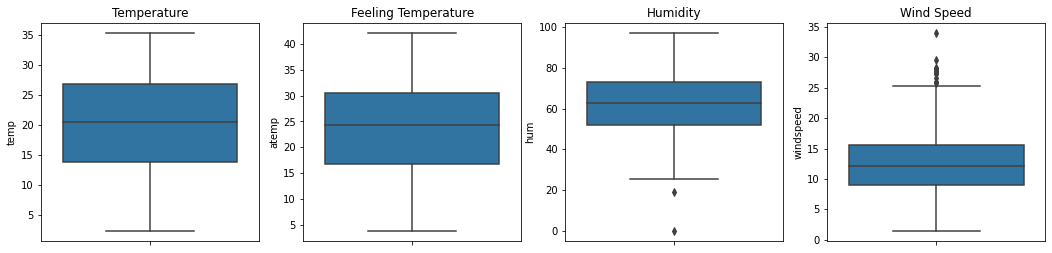

In [13]:
# Checking for outliers and evaluating numercial variables
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.boxplot(y = df.temp, data = df)
plt.title('Temperature')
plt.subplot(1,4,2)
sns.boxplot(y = df.atemp, data = df)
plt.title('Feeling Temperature')
plt.subplot(1,4,3)
sns.boxplot(y = df.hum, data = df)
plt.title('Humidity')
plt.subplot(1,4,4)
sns.boxplot(y = df.windspeed, data = df)
plt.title('Wind Speed')


Text(0.5, 1.0, 'Weather Situation')

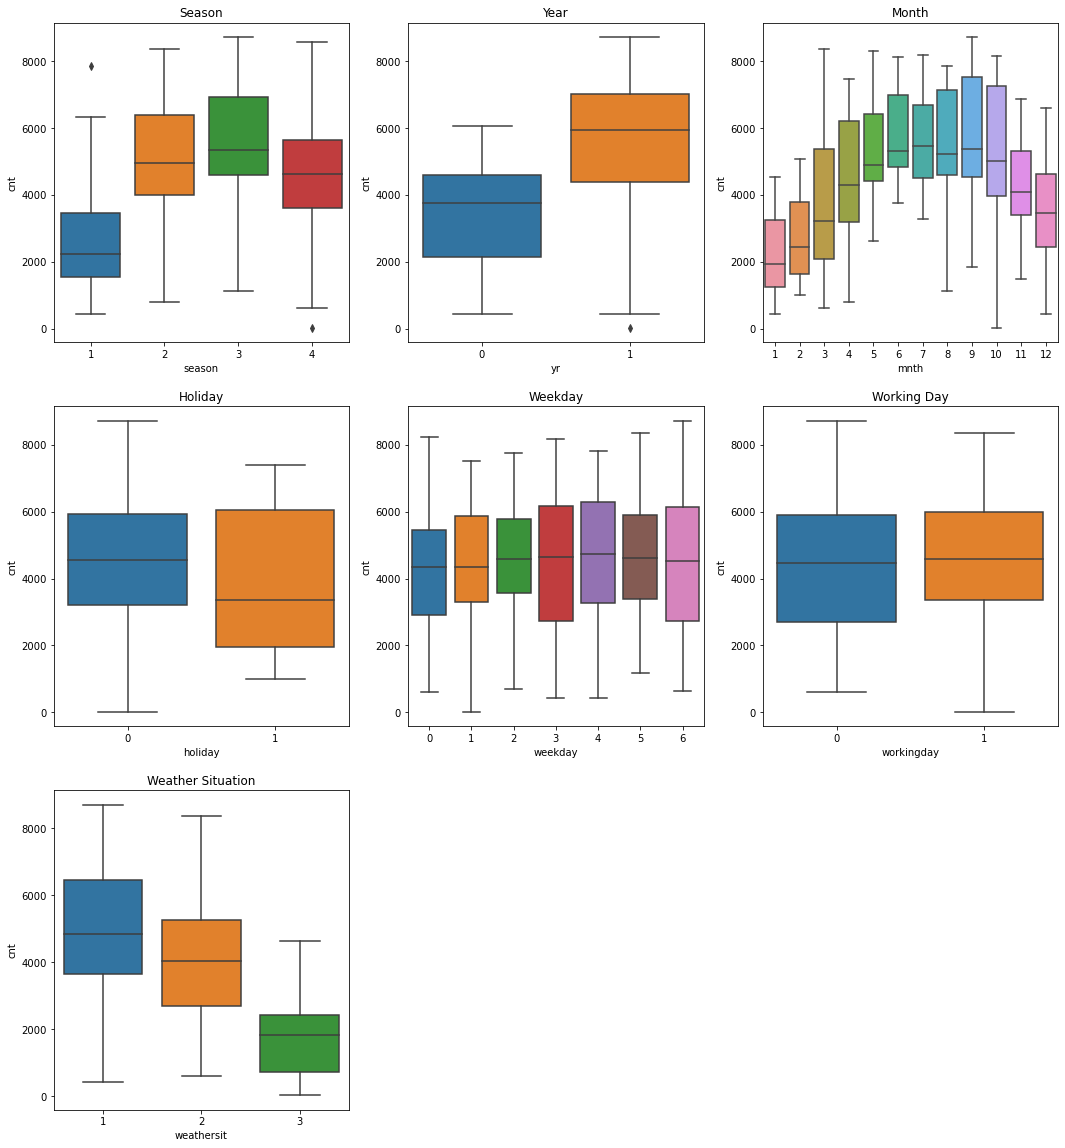

In [14]:
# Evaluating categorical variables
plt.figure(figsize=(18,20))
plt.subplot(3,3,1)
sns.boxplot(x = df.season, y = df.cnt, data = df)
plt.title('Season')
plt.subplot(3,3,2)
sns.boxplot(x = df.yr, y = df.cnt, data = df)
plt.title('Year')
plt.subplot(3,3,3)
sns.boxplot(x = df.mnth, y = df.cnt, data = df)
plt.title('Month')
plt.subplot(3,3,4)
sns.boxplot(x = df.holiday, y = df.cnt, data = df)
plt.title('Holiday')
plt.subplot(3,3,5)
sns.boxplot(x = df.weekday, y = df.cnt, data = df)
plt.title('Weekday')
plt.subplot(3,3,6)
sns.boxplot(x = df.workingday, y = df.cnt, data = df)
plt.title('Working Day')
plt.subplot(3,3,7)
sns.boxplot(x = df.weathersit, y = df.cnt, data = df)
plt.title('Weather Situation')

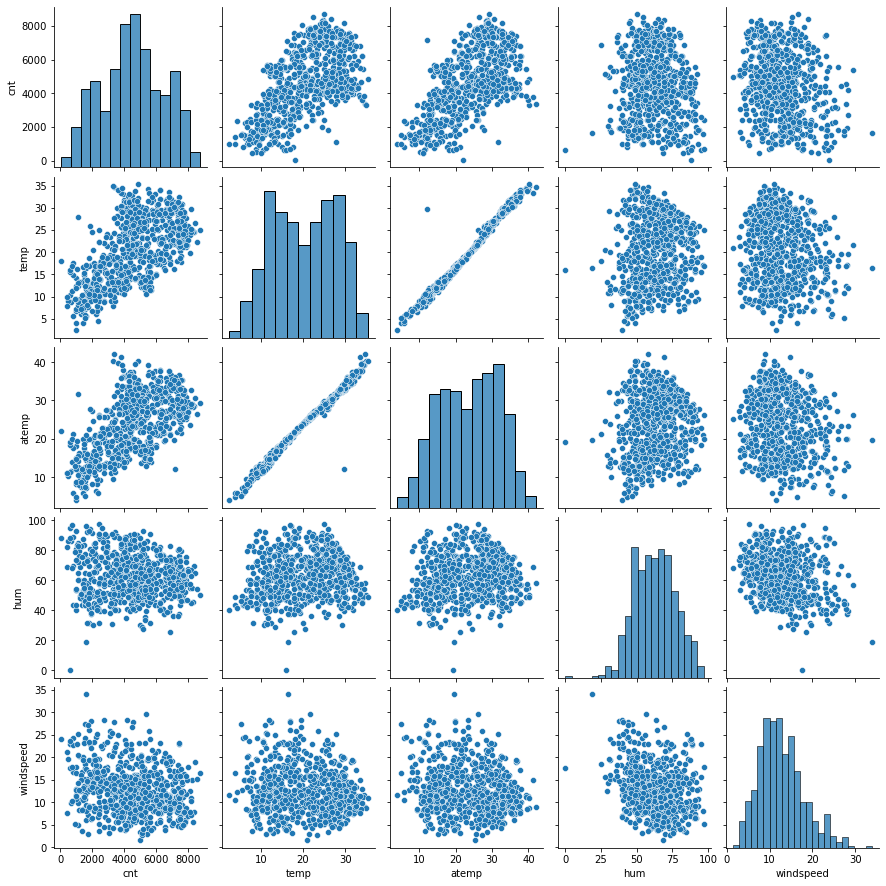

In [15]:
num_col = ['cnt','temp','atemp','hum','windspeed']
sns.pairplot(df, vars = num_col)
plt.show()

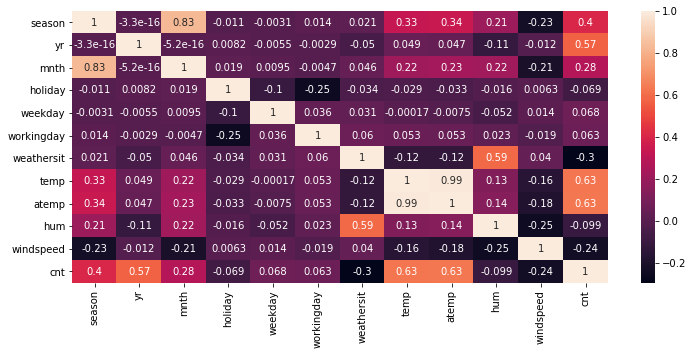

In [16]:
plt.figure(figsize = (12,5))
cor=df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [17]:
# Dropping the variable atemp as it is 0.99 related to the variable temp
df.drop(['atemp'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [18]:
# Getting dummies for categorical variables
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])



In [19]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [20]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

# Spliting data into train and test

In [21]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
scaler = MinMaxScaler()

In [23]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,1,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,1,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [25]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,...,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,...,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


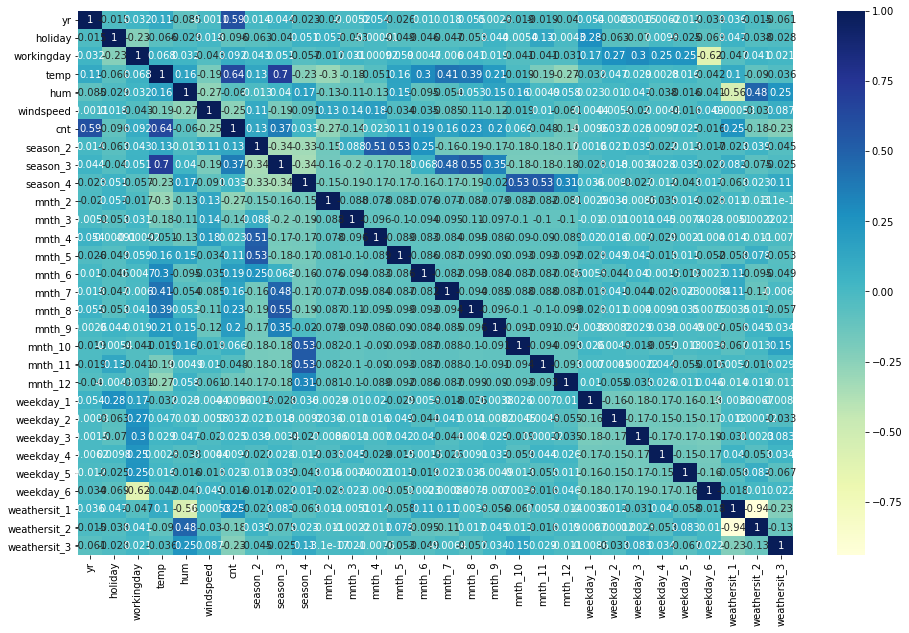

In [26]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Building a Model using RFE

# Dividing into X and Y sets for the model building

In [27]:
y_train = df_train.pop('cnt')
X_train = df_train

In [28]:
# Building a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
#Cutting down number of features to 10 using automated approach
rfe = RFE(lr,10)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [30]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 7),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 8),
 ('mnth_4', False, 10),
 ('mnth_5', False, 9),
 ('mnth_6', False, 11),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 6),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', False, 16),
 ('weekday_2', False, 17),
 ('weekday_3', False, 19),
 ('weekday_4', False, 20),
 ('weekday_5', False, 18),
 ('weekday_6', False, 4),
 ('weathersit_1', False, 2),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [31]:
#Selecting columns for Model 1 - all columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0


In [34]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [36]:
#Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.16e-186
Time:                        07:31:51   Log-Likelihood:                 494.69
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2762      0.026     10.565   

# No columns need to be dropped as the P Value is less than for all the columns

In [37]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.54
3,temp,1.45
8,mnth_8,1.43
6,season_2,1.37
7,season_4,1.31
4,hum,1.26
9,mnth_9,1.21
5,windspeed,1.16
10,weathersit_3,1.11
1,yr,1.02


In [38]:
# Dropping the variable const as it has high VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.01
2,temp,8.51
4,windspeed,3.57
0,yr,2.01
5,season_2,1.81
6,season_4,1.74
7,mnth_8,1.57
8,mnth_9,1.30
9,weathersit_3,1.09
1,holiday,1.04


In [40]:
# The variable mnth_8 is insignificant as it has relatively higher P Value and low VIF
# Dropping the varibale month_8
X_train_new1 = X_train_new.drop(['mnth_8'], axis=1)

In [41]:
# Building next fitted model
X_train_lm1 = sm.add_constant(X_train_new1)

lm1 = sm.OLS(y_train, X_train_lm1).fit()

In [42]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.16e-186
Time:                        07:31:51   Log-Likelihood:                 490.26
No. Observations:                 510   AIC:                            -960.5
Df Residuals:                     500   BIC:                            -918.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2690      0.026     10.254   

In [43]:
#Dropping the constant term
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [44]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.01
2,temp,7.10
4,windspeed,3.53
0,yr,2.01
6,season_4,1.64
5,season_2,1.58
7,mnth_9,1.20
8,weathersit_3,1.09
1,holiday,1.04


In [45]:
#Dropping the variable hum as it has high VIF
X_train_new2 = X_train_lm1.drop(["hum"], axis = 1)

In [46]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.42e-171
Time:                        07:31:51   Log-Likelihood:                 453.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     501   BIC:                            -850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0872      0.017      5.001   

In [47]:
#Dropping the constant
X_train_lm2 = X_train_lm2.drop(['const'],axis=1)

In [48]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_2,1.55
5,season_4,1.35
6,mnth_9,1.20
7,weathersit_3,1.06
1,holiday,1.03


In [49]:
#Dropping the column holiday as it has relativ ely higher P Value and low VIF
X_train_new3 = X_train_lm2.drop(['holiday'],axis=1)

In [50]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     286.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.49e-171
Time:                        07:31:51   Log-Likelihood:                 448.62
No. Observations:                 510   AIC:                            -881.2
Df Residuals:                     502   BIC:                            -847.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0835      0.018      4.761   

In [51]:
#Dropping the constant 
X_train_lm3 = X_train_lm3.drop(['const'],axis=1)

In [52]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.63
2,windspeed,2.95
0,yr,2.00
3,season_2,1.54
4,season_4,1.34
5,mnth_9,1.19
6,weathersit_3,1.06


In [53]:
#Dropping the variable windspeed as it has negative correlation to the varible cnt
X_train_new4 = X_train_lm3.drop(['windspeed'],axis=1)

In [54]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     312.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.95e-166
Time:                        07:31:51   Log-Likelihood:                 434.47
No. Observations:                 510   AIC:                            -854.9
Df Residuals:                     503   BIC:                            -825.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0237      0.014      1.706   

In [55]:
#Dropping the constant 
X_train_lm4 = X_train_lm4.drop(['const'],axis=1)

In [56]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.70
0,yr,1.93
2,season_2,1.48
3,season_4,1.29
4,mnth_9,1.19
5,weathersit_3,1.05


In [72]:
#Dropping the variable temp as it has high VIF
X_train_new5 = X_train_lm4.drop(['temp'],axis=1)

In [73]:
# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     89.52
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.72e-67
Time:                        07:25:07   Log-Likelihood:                 200.58
No. Observations:                 510   AIC:                            -389.2
Df Residuals:                     504   BIC:                            -363.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3292      0.013     25.057   

In [74]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.26
2,season_2,1.16
3,season_4,1.14
4,mnth_9,1.04
5,weathersit_3,1.02
1,yr,1.00


# Residual Analysis of the train data

In [ ]:
# We have decided to keep the model 4 as there is ahuge drop in the R squared and Adjusted R squared value

In [57]:
X_train_lm4=sm.add_constant(X_train_lm4)
X_train_lm4.columns
X_train_lm4

,const,yr,temp,season_2,season_4,mnth_9,weathersit_3
653,1.0,1,0.509887,0,1,0,0
576,1.0,1,0.815169,0,0,0,0
426,1.0,1,0.442393,0,0,0,0
728,1.0,1,0.245101,0,0,0,0
482,1.0,1,0.395666,1,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,1,0,0,0
578,1.0,1,0.863973,0,0,0,0
53,1.0,0,0.202618,0,0,0,0
350,1.0,0,0.248216,0,1,0,0


In [58]:
y_train_pred = lm4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

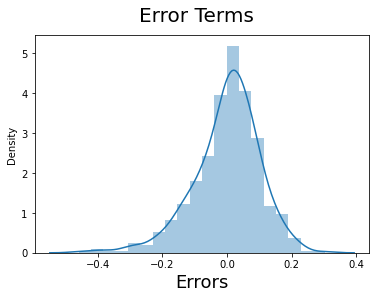

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [60]:
# Errors are normaly distributed

In [61]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7883455404195336

In [62]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.7883455)*(11-1)/(11-1-1)
print(Adj_r2)

0.7648283333333334


# Making Predictions

### Applying the scaling on the test sets

In [63]:
num_vars = ['temp','hum','windspeed','cnt']

In [64]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [67]:
# Making predictions
y_pred = lm4.predict(X_test_new)

Text(0, 0.5, 'y_pred')

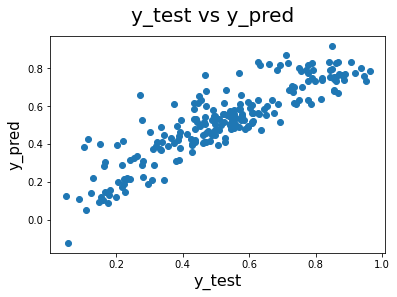

In [68]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=15)  

In [69]:
#Calculating R2 Score
from sklearn.metrics import r2_score

r2_score(y_true = y_test, y_pred = y_pred )

0.7740468307632496

In [70]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.7740768)*(11-1)/(11-1-1)
print(Adj_r2)

0.7489742222222222


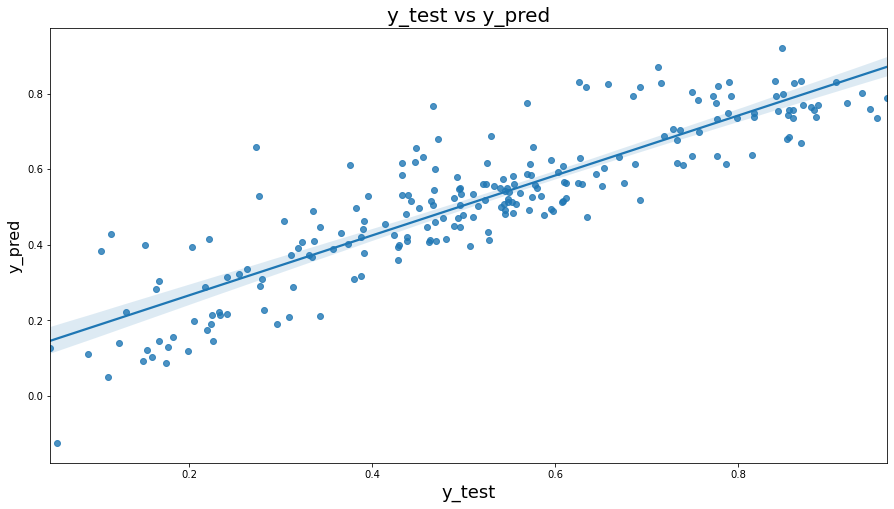

In [71]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()